# Market Basket

## Libraries

In [1]:
#pip install apyori

In [2]:
#pip install mlxtend

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori


# Youtube

https://www.youtube.com/watch?v=aqsa-gO_aq4


https://www.kaggle.com/datasets/rashikrahmanpritom/groceries-dataset-for-market-basket-analysismba/data

In [4]:
gr = pd.read_csv("Groceries_dataset.csv")

In [5]:
gr.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [6]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
gr.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [8]:
gr["Date"] = pd.to_datetime(gr["Date"])

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_4754/421856065.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  gr["Date"] = pd.to_datetime(gr["Date"])


In [9]:
gr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


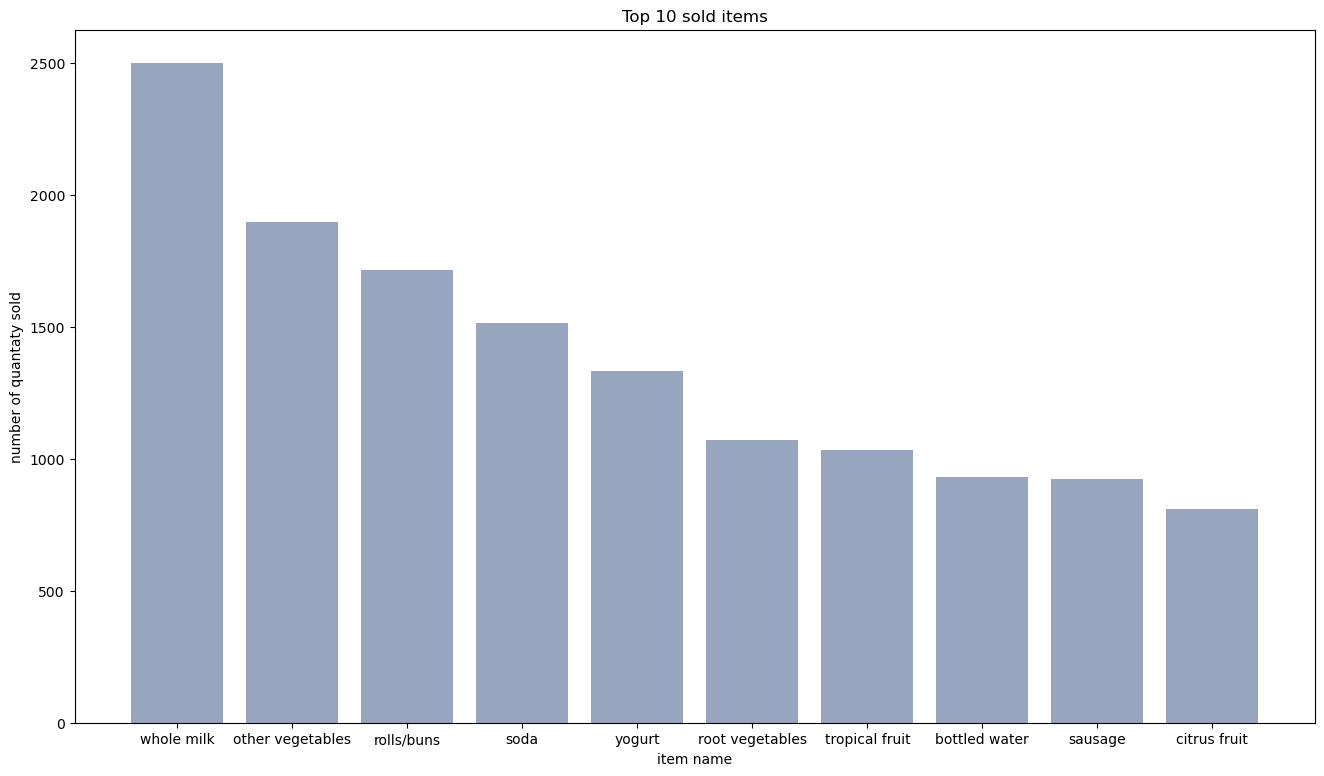

In [10]:
item_distr = gr.groupby(by = "itemDescription").size().reset_index(name = "Frequency").sort_values(by = "Frequency", ascending = False).head(10)

bars = item_distr["itemDescription"]
height = item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize = (16, 9))

plt.bar(x_pos, height, color = (0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 sold items")
plt.xlabel("item name")
plt.ylabel("number of quantaty sold")

plt.xticks(x_pos, bars)

plt.show()

In [11]:
gr = gr.set_index("Date")
gr.tail(1)


,Member_number,itemDescription
Date,,
2014-12-26,1521,cat food


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'number of item')]

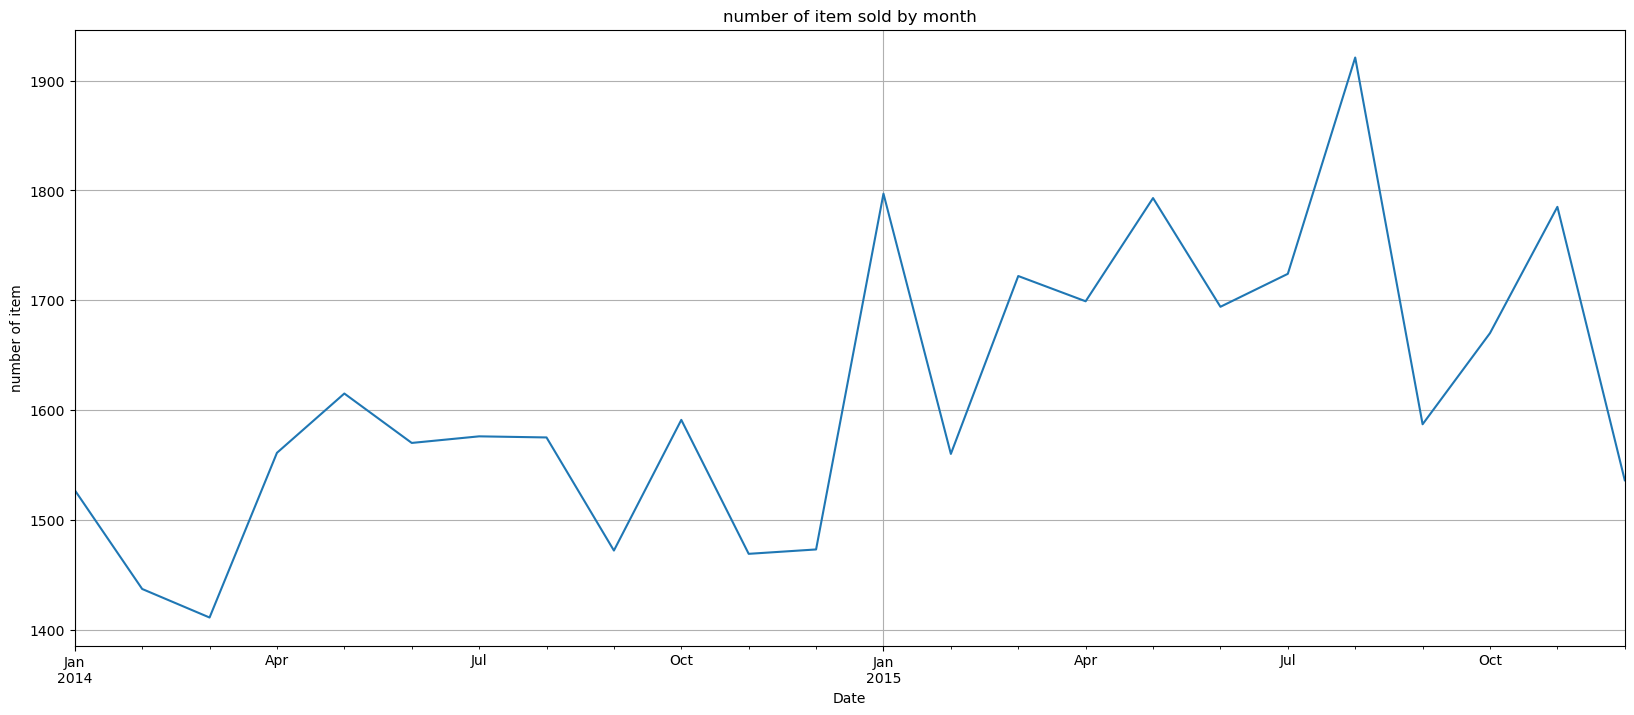

In [12]:
gr.resample("M")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = "number of item sold by month").set(xlabel = "Date", ylabel = "number of item")

[Text(0.5, 0, 'Date'), Text(0, 0.5, 'number of item')]

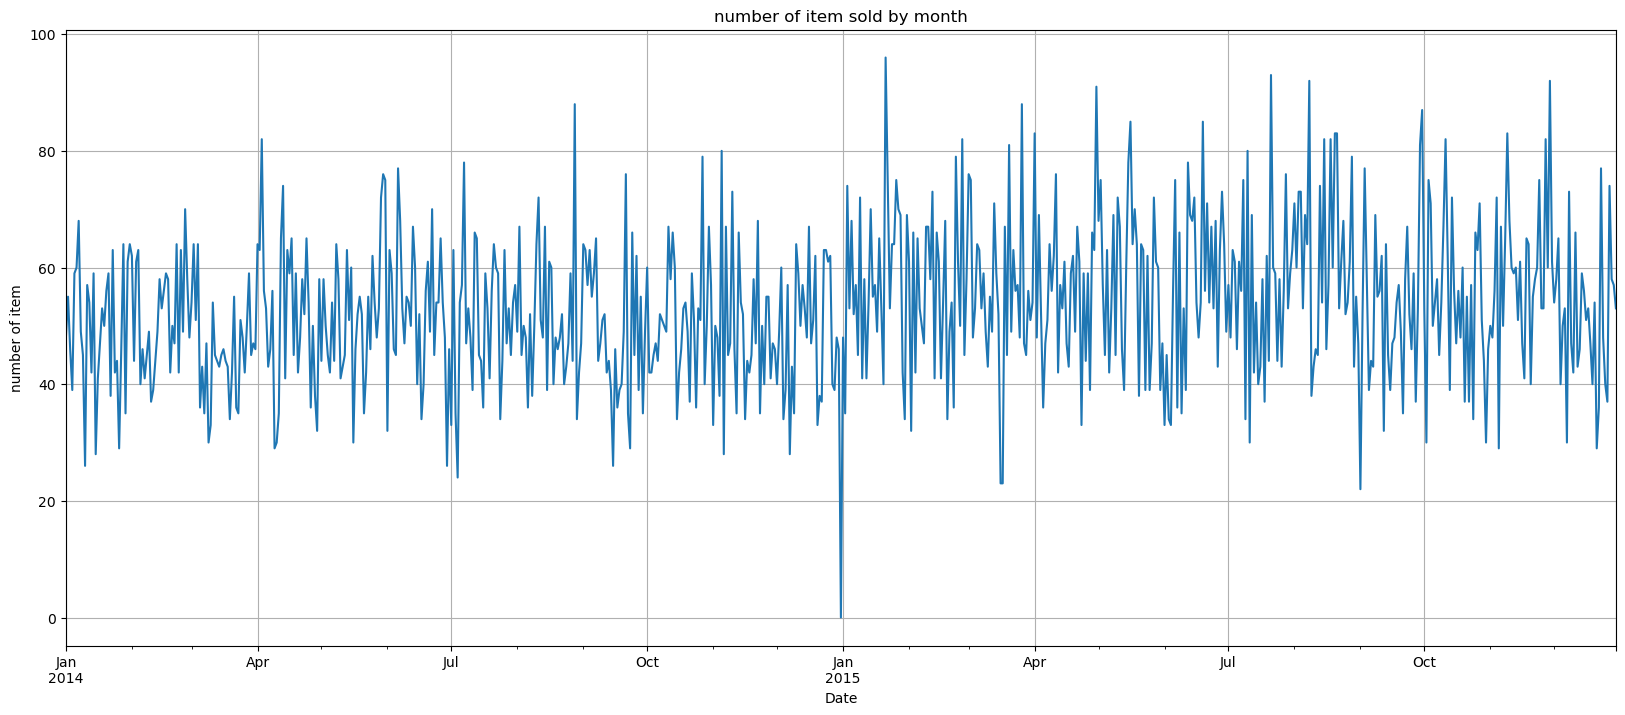

In [13]:
gr.resample("D")["itemDescription"].count().plot(figsize = (20,8), grid = True, title = "number of item sold by month").set(xlabel = "Date", ylabel = "number of item")

In [14]:
cust_level = gr[["Member_number", "itemDescription"]].sort_values(by = "Member_number", ascending = False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
Date,,
2015-02-10,5000,soda
2015-02-10,5000,semi-finished bread
2014-03-09,5000,fruit/vegetable juice
2014-11-16,5000,bottled beer
2015-02-10,5000,root vegetables
...,...,...
2014-06-24,1000,whole milk
2015-05-27,1000,pickled vegetables
2015-11-25,1000,sausage


In [15]:
transactions = [a[1]["itemDescription"].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [16]:
rules = apriori(transactions = transactions, min_support = 0.002, min_confidence = 0.05, min_lift = 3, min_lenght = 2)

In [17]:
results = list(rules)

In [18]:
results

[RelationRecord(items=frozenset({'kitchen towels', 'UHT-milk'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'kitchen towels'}), items_add=frozenset({'UHT-milk'}), confidence=0.30000000000000004, lift=3.821568627450981)]),
 RelationRecord(items=frozenset({'beef', 'potato products'}), support=0.002565418163160595, ordered_statistics=[OrderedStatistic(items_base=frozenset({'potato products'}), items_add=frozenset({'beef'}), confidence=0.4545454545454546, lift=3.8021849395239955)]),
 RelationRecord(items=frozenset({'canned fruit', 'coffee'}), support=0.002308876346844536, ordered_statistics=[OrderedStatistic(items_base=frozenset({'canned fruit'}), items_add=frozenset({'coffee'}), confidence=0.4285714285714286, lift=3.7289540816326534)]),
 RelationRecord(items=frozenset({'meat spreads', 'domestic eggs'}), support=0.0035915854284248334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'meat spreads'}), items_add=frozenset({'domestic egg

In [19]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][1] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsindataframe = pd.DataFrame(inspect(results), columns = ["Left Hand Side", "Right Hand Side", "Support", "Confidence", "Lift"])

In [20]:
resultsindataframe

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
0,kitchen towels,UHT-milk,0.002309,(UHT-milk),3.821569
1,potato products,beef,0.002565,(beef),3.802185
2,canned fruit,coffee,0.002309,(coffee),3.728954
3,meat spreads,domestic eggs,0.003592,(domestic eggs),3.004239
4,flour,mayonnaise,0.002309,(mayonnaise),3.338599
...,...,...,...,...,...
5341,bottled water,soda,0.002565,"(soda, rolls/buns, other vegetables, whole mil...",5.800595
5342,bottled water,soda,0.002309,"(soda, whole milk, yogurt, sausage)",3.661622
5343,root vegetables,soda,0.002052,"(soda, whole milk, yogurt, sausage)",4.608246
5344,root vegetables,soda,0.002052,"(soda, whole milk, yogurt, sausage)",5.114647


In [21]:
resultsindataframe.nlargest(n = 10, columns = "Lift")

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
4915,berries,yogurt,0.002052,"(yogurt, pork, other vegetables, pip fruit)",14.654135
4914,berries,whole milk,0.002052,"(whole milk, pork, other vegetables, pip fruit)",12.068111
2674,beef,soda,0.002052,"(soda, pork, other vegetables)",11.524021
3573,citrus fruit,soda,0.002052,"(soda, yogurt, specialty chocolate)",11.443670
4133,long life bakery product,whole milk,0.002052,"(whole milk, meat, rolls/buns)",11.105413
3290,bottled water,soda,0.002052,"(soda, citrus fruit, sausage)",10.322410
2904,bottled beer,other vegetables,0.002309,"(other vegetables, misc. beverages, rolls/buns)",9.533152
5045,bottled water,soda,0.002052,"(soda, whole milk, pastry, other vegetables)",9.438257
2902,bottled beer,root vegetables,0.002052,"(root vegetables, pastry, domestic eggs)",9.415459
2734,berries,soda,0.002309,"(soda, brown bread, shopping bags)",9.232105


# Tutorial 9 - Apriori Algorithm

http://localhost:8888/notebooks/Documents/CCT/Machine%20Learning/Tutorial_9/Tutorial_9_part_I.ipynb

In [37]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

aa = pd.read_csv("Groceries_dataset.csv")
aa.tail(1)
aa["itemDescription"] = aa["itemDescription"].str.strip()

In [26]:
# Remove any whote spaces or specified characters at the start and end of a string. 
gr["itemDescription"] = gr["itemDescription"].str.strip()

In [28]:
# Resample data by month
monthly_data = gr.resample('M').sum()

In [31]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Assuming 'gr' is your DataFrame

# Ensure 'Date' is set as index and convert to datetime if necessary
gr.index = pd.to_datetime(gr.index)

# Resample by Month (create a 'Month' period column)
gr['Month'] = gr.index.to_period('M')

# Group by 'Month', 'Member_number', and 'itemDescription', then pivot the table
basket = (gr.groupby(['Month', 'Member_number', 'itemDescription'])
             .size()
             .unstack(fill_value=0)
             .reset_index()
             .set_index('Member_number'))

# Drop 'Month' column if it ends up in the DataFrame
if 'Month' in basket.columns:
    basket = basket.drop(columns='Month')

# Convert counts to 1s and 0s using map (not applymap)
basket = basket.map(lambda x: x > 0)

# Ensure the DataFrame is of boolean type
basket = basket.astype(bool)

# Apply the apriori algorithm
frequent_itemsets_ap = apriori(basket, min_support=0.05, use_colnames=True)

# Print the resulting frequent itemsets
print(frequent_itemsets_ap)


     support            itemsets
0   0.064941     (bottled water)
1   0.050270       (canned beer)
2   0.056958      (citrus fruit)
3   0.129809  (other vegetables)
4   0.055520            (pastry)
5   0.052499         (pip fruit)
6   0.117080        (rolls/buns)
7   0.074577   (root vegetables)
8   0.064150           (sausage)
9   0.051205     (shopping bags)
10  0.103704              (soda)
11  0.072564    (tropical fruit)
12  0.167925        (whole milk)
13  0.091766            (yogurt)


In [33]:
import pandas as pd
from mlxtend.frequent_patterns import apriori

# Assuming 'gr' is your DataFrame

# Ensure 'Date' is set as index and convert to datetime if necessary
gr.index = pd.to_datetime(gr.index)

# Resample by Month (create a 'Month' period column)
gr['Day'] = gr.index.to_period('D')

# Group by 'Month', 'Member_number', and 'itemDescription', then pivot the table
basket = (gr.groupby(['Day', 'Member_number', 'itemDescription'])
             .size()
             .unstack(fill_value=0)
             .reset_index()
             .set_index('Member_number'))

# Drop 'Month' column if it ends up in the DataFrame
if 'Day' in basket.columns:
    basket = basket.drop(columns='Day')

# Convert counts to 1s and 0s using map (not applymap)
basket = basket.map(lambda x: x > 0)

# Ensure the DataFrame is of boolean type
basket = basket.astype(bool)

# Apply the apriori algorithm
frequent_itemsets_ap = apriori(basket, min_support=0.05, use_colnames=True)

# Print the resulting frequent itemsets
print(frequent_itemsets_ap)


     support            itemsets
0   0.060683     (bottled water)
1   0.053131      (citrus fruit)
2   0.122101  (other vegetables)
3   0.051728            (pastry)
4   0.110005        (rolls/buns)
5   0.069572   (root vegetables)
6   0.060349           (sausage)
7   0.097106              (soda)
8   0.067767    (tropical fruit)
9   0.157923        (whole milk)
10  0.085879            (yogurt)


In [34]:
# Create and declare a method named as 'encode_units()'
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1

basket_sets = basket.applymap(encode_units)

basket_sets

/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_4754/2697181980.py:8: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket_sets = basket.applymap(encode_units)


itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1249,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1440,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1789,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3738,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3971,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4058,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
frequent_itemsets = apriori(basket_sets, min_support = 0.005, use_colnames = True)

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [56]:
rules = association_rules(frequent_itemsets, metric = "lift", min_threshold = 1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
1,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
2,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
3,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
4,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508


In [60]:
rules[ (rules['lift'] >= 1) &
       (rules['confidence'] >= 0.005) ]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(frankfurter),(other vegetables),0.037760,0.122101,0.005146,0.136283,1.116150,0.000536,1.016420,0.108146
1,(other vegetables),(frankfurter),0.122101,0.037760,0.005146,0.042146,1.116150,0.000536,1.004579,0.118536
2,(soda),(sausage),0.097106,0.060349,0.005948,0.061253,1.014975,0.000088,1.000963,0.016341
3,(sausage),(soda),0.060349,0.097106,0.005948,0.098560,1.014975,0.000088,1.001613,0.015702
4,(yogurt),(sausage),0.085879,0.060349,0.005748,0.066926,1.108986,0.000565,1.007049,0.107508
5,(sausage),(yogurt),0.060349,0.085879,0.005748,0.095238,1.108986,0.000565,1.010345,0.104587


In [61]:
print(basket["frankfurter"].sum())
print(basket["sausage"].sum())

565
903


# Tutorial 9 - FP Growth Algorithm

http://localhost:8888/notebooks/Documents/CCT/Machine%20Learning/Tutorial_9/Tutorial_9_part_II.ipynb

In [63]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth

# Assuming 'gr' is your DataFrame

# Ensure 'Date' is set as index and convert to datetime if necessary
gr.index = pd.to_datetime(gr.index)

# Resample by Month (create a 'Month' period column)
gr['Month'] = gr.index.to_period('M')

# Group by 'Month', 'Member_number', and 'itemDescription', then pivot the table
basket = (gr.groupby(['Month', 'Member_number', 'itemDescription'])
             .size()
             .unstack(fill_value=0)
             .reset_index()
             .set_index('Member_number'))

# Drop 'Month' column if it ends up in the DataFrame
if 'Month' in basket.columns:
    basket = basket.drop(columns='Month')

# Convert counts to 1s and 0s using applymap
basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(int)

# Verify the conversion
print(basket.head())
print(basket.info())

# Apply the fpgrowth algorithm
frequent_itemsets_fp = fpgrowth(basket, min_support=0.01, use_colnames=True)

# Print the resulting frequent itemsets
print(frequent_itemsets_fp.head())
print(frequent_itemsets_fp.shape)


/var/folders/0_/23jph36d0154h_0z_b1ppjfw0000gn/T/ipykernel_4754/2805155873.py:24: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0).astype(int)


itemDescription  Instant food products  UHT-milk  abrasive cleaner  \
Member_number                                                        
1003                                 0         0                 0   
1005                                 0         0                 0   
1009                                 0         0                 0   
1013                                 0         0                 0   
1032                                 0         0                 0   

itemDescription  artif. sweetener  baby cosmetics  bags  baking powder  \
Member_number                                                            
1003                            0               0     0              0   
1005                            0               0     0              0   
1009                            0               0     0              0   
1013                            0               0     0              0   
1032                            0               0     0          

/Users/izaiaszacca/anaconda3/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support              itemsets
0  0.017979        (frozen meals)
1  0.117080          (rolls/buns)
2  0.046962  (whipped/sour cream)
3  0.034592           (margarine)
4  0.064941       (bottled water)
(75, 2)


In [65]:
from mlxtend.frequent_patterns import association_rules

# Display the reles due to fp-growth algorithm
rules_fp = association_rules(frequent_itemsets_fp, metric = "confidence", min_threshold = 0.005)

print(rules_fp)

           antecedents         consequents  antecedent support  \
0         (whole milk)        (rolls/buns)            0.167925   
1         (rolls/buns)        (whole milk)            0.117080   
2   (other vegetables)        (rolls/buns)            0.129809   
3         (rolls/buns)  (other vegetables)            0.117080   
4         (whole milk)            (yogurt)            0.167925   
5             (yogurt)        (whole milk)            0.091766   
6             (yogurt)  (other vegetables)            0.091766   
7   (other vegetables)            (yogurt)            0.129809   
8               (soda)        (whole milk)            0.103704   
9         (whole milk)              (soda)            0.167925   
10              (soda)  (other vegetables)            0.103704   
11  (other vegetables)              (soda)            0.129809   
12        (whole milk)    (tropical fruit)            0.167925   
13    (tropical fruit)        (whole milk)            0.072564   
14        